## 📁 About the Dataset

This project uses crime data derived from the **FBI Summary Reporting System (SRS)**. The dataset includes **estimated crime totals** from **1979 to 2019** for the **United States and all 50 states**.

### 🧾 Description:
- This version of the SRS dataset includes **both national and state-level estimates**.
- These figures represent the FBI’s **best estimates** traditionally published in their annual crime reports.
- Crime categories include:
  - Violent crimes: Homicide, Rape, Robbery, Aggravated Assault
  - Property crimes: Burglary, Larceny, Motor Vehicle Theft

### 📍 Focus:
For the purpose of this analysis, we focus exclusively on the **state of Texas** to study long-term crime patterns, identify high and low crime years, and evaluate which types of crimes are most prevalent.

In [2]:
!pip install seaborn scikit-learn matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from google.colab import files

df = pd.read_csv("cleaned_crime_data.csv")
df.head()

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,...,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
0,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,...,292.0,491.133005,13.300493,71.921182,109.605911,296.305419,5712.561576,1383.251232,3713.300493,616.009852
1,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,...,1037.0,413.319183,13.159989,27.513929,109.498541,263.146723,3830.512072,1287.264526,2223.162643,320.084903
2,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,...,595.0,366.238532,9.082569,27.293578,74.587156,255.275229,3254.541284,984.266055,2076.467890,193.807339
3,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,...,1120.0,592.979592,8.938776,45.714286,175.714286,362.612245,7264.367347,1996.571429,4774.530612,493.265306
4,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,...,12239.0,811.098872,13.006697,53.925802,333.834156,410.332217,6657.653331,2186.773000,3732.587240,738.293091


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2075 non-null   int64  
 1   state_abbr                2075 non-null   object 
 2   state_name                2075 non-null   object 
 3   population                2075 non-null   int64  
 4   violent_crime             2075 non-null   int64  
 5   homicide                  2075 non-null   int64  
 6   robbery                   2075 non-null   int64  
 7   aggravated_assault        2075 non-null   int64  
 8   property_crime            2075 non-null   int64  
 9   burglary                  2075 non-null   int64  
 10  larceny                   2075 non-null   int64  
 11  motor_vehicle_theft       2075 non-null   int64  
 12  rape                      2075 non-null   float64
 13  violent_crime_rate        2075 non-null   float64
 14  homicide

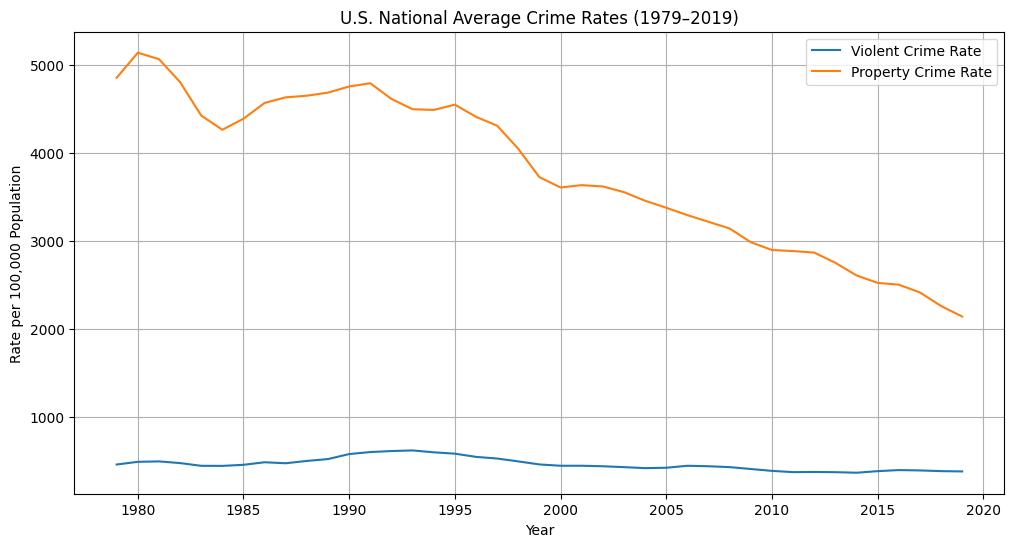

In [4]:
# Plot national crime trends over time

# Group by year and get mean rates for entire country
national_trends = df.groupby('year')[[col for col in df.columns if col.endswith('_rate')]].mean().reset_index()

# Plot violent vs property crime over time
plt.figure(figsize=(12, 6))
plt.plot(national_trends['year'], national_trends['violent_crime_rate'], label='Violent Crime Rate')
plt.plot(national_trends['year'], national_trends['property_crime_rate'], label='Property Crime Rate')
plt.title('U.S. National Average Crime Rates (1979–2019)')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-2486516046>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='violent_crime_rate', y='state_name', palette='Reds_r')


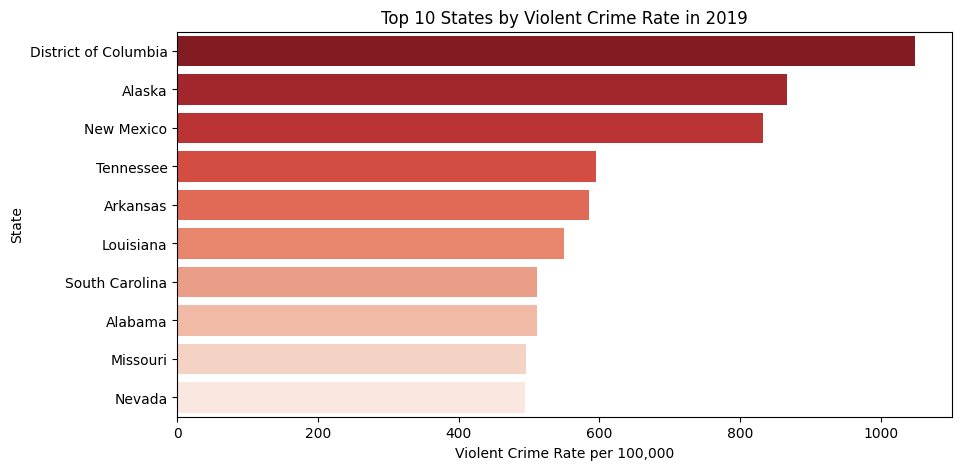

In [5]:
# Top 10 most violent states in the most recent year
latest_year = df['year'].max()
latest = df[df['year'] == latest_year]

top_states = latest.sort_values(by='violent_crime_rate', ascending=False)[['state_name', 'violent_crime_rate']].head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x='violent_crime_rate', y='state_name', palette='Reds_r')
plt.title(f'Top 10 States by Violent Crime Rate in {latest_year}')
plt.xlabel('Violent Crime Rate per 100,000')
plt.ylabel('State')
plt.show()

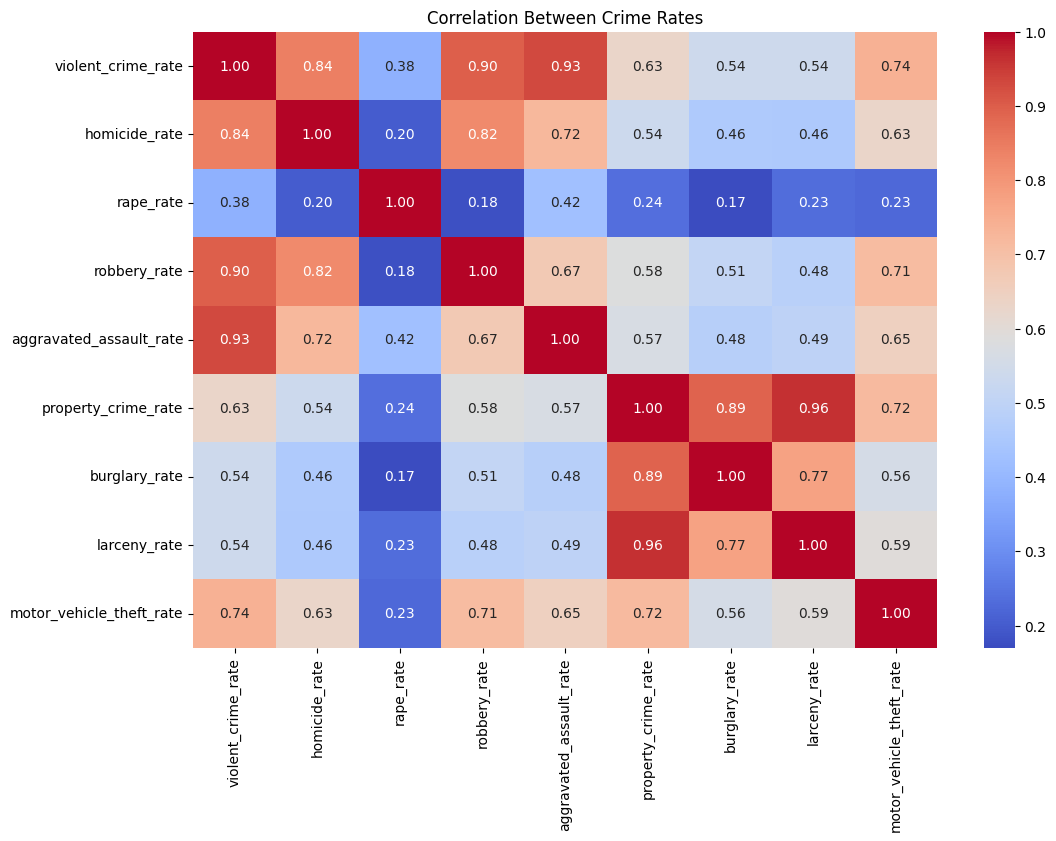

In [7]:
# Correlation heatmap of crime rates
plt.figure(figsize=(12, 8))
rate_cols = [col for col in df.columns if col.endswith('_rate')]
sns.heatmap(df[rate_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Crime Rates")
plt.show()

In [15]:
texas_df = df[df['state_name'] == 'Texas'].copy()

In [16]:
crime_types = [
    'homicide', 'rape', 'robbery', 'aggravated_assault',
    'burglary', 'larceny', 'motor_vehicle_theft'
]

texas_df['total_crime'] = texas_df[crime_types].sum(axis=1)

In [17]:
max_year = texas_df.loc[texas_df['total_crime'].idxmax()]
min_year = texas_df.loc[texas_df['total_crime'].idxmin()]

print("🔺 Most Total Crime Year in Texas:")
print(f"Year: {int(max_year['year'])}")
print(f"Total Crime: {int(max_year['total_crime'])}")
print(f"Population: {int(max_year['population'])}")
print("By Crime Type:")
for crime in crime_types:
    print(f"  {crime}: {int(max_year[crime])}")

print("\n🔻 Least Total Crime Year in Texas:")
print(f"Year: {int(min_year['year'])}")
print(f"Total Crime: {int(min_year['total_crime'])}")
print(f"Population: {int(min_year['population'])}")
print("By Crime Type:")
for crime in crime_types:
    print(f"  {crime}: {int(min_year[crime])}")

🔺 Most Total Crime Year in Texas:
Year: 1991
Total Crime: 1356527
Population: 17349000
By Crime Type:
  homicide: 2652
  rape: 9266
  robbery: 49700
  aggravated_assault: 84125
  burglary: 312693
  larceny: 734261
  motor_vehicle_theft: 163830

🔻 Least Total Crime Year in Texas:
Year: 1979
Total Crime: 793097
Population: 13385000
By Crime Type:
  homicide: 2235
  rape: 6043
  robbery: 25667
  aggravated_assault: 34043
  burglary: 239758
  larceny: 412515
  motor_vehicle_theft: 72836


In [19]:
rate_cols = [f"{col}_rate" for col in crime_types]
avg_rates = texas_df[rate_cols].mean().sort_values(ascending=False)

print("\n Average Crime Rates in Texas (1979–2019):")
for col, val in avg_rates.items():
    print(f"{col.replace('_rate','').capitalize()}: {val:.2f} per 100,000")


 Average Crime Rates in Texas (1979–2019):
Larceny: 3077.28 per 100,000
Burglary: 1204.78 per 100,000
Motor_vehicle_theft: 493.93 per 100,000
Aggravated_assault: 331.52 per 100,000
Robbery: 172.32 per 100,000
Rape: 43.19 per 100,000
Homicide: 8.88 per 100,000


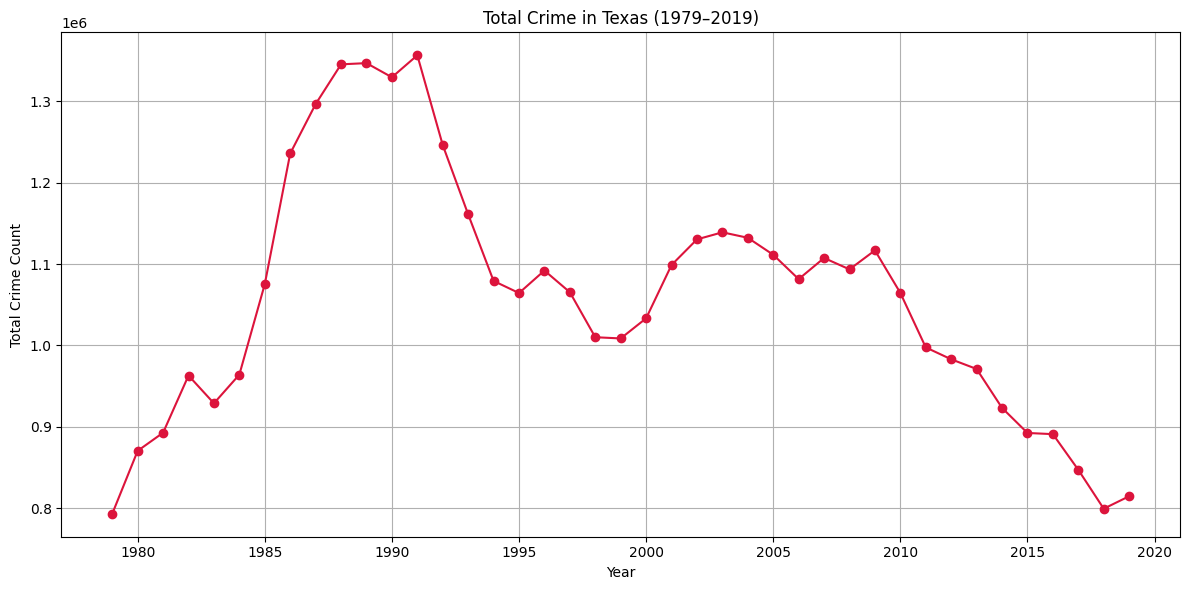

In [20]:
# Total Crime Over Time in Texas
plt.figure(figsize=(12, 6))
plt.plot(texas_df['year'], texas_df['total_crime'], marker='o', color='crimson')
plt.title('Total Crime in Texas (1979–2019)')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()

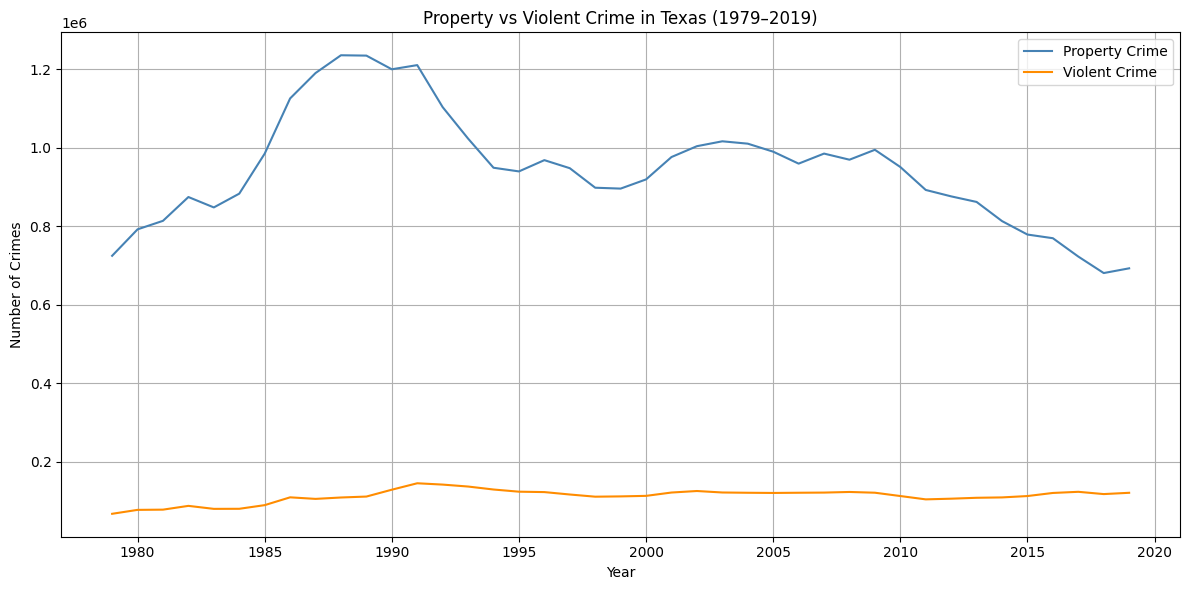

In [21]:
# Property vs Violent Crime Over Time
plt.figure(figsize=(12, 6))
plt.plot(texas_df['year'], texas_df['property_crime'], label='Property Crime', color='steelblue')
plt.plot(texas_df['year'], texas_df['violent_crime'], label='Violent Crime', color='darkorange')
plt.title('Property vs Violent Crime in Texas (1979–2019)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

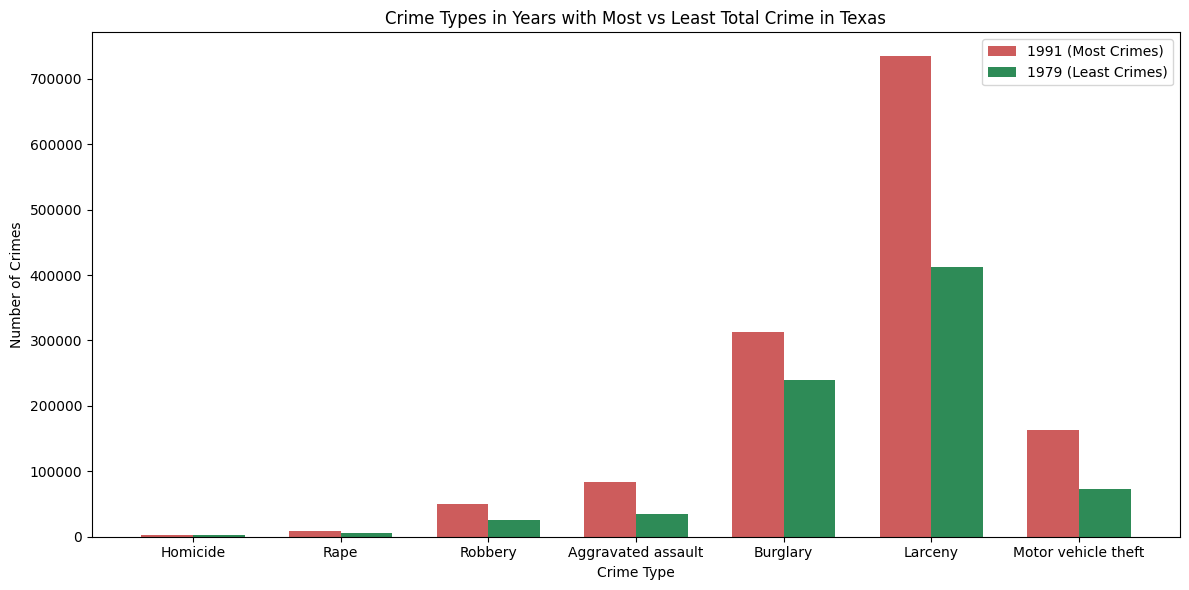

In [22]:
# Define crime type values for max and min crime years
crime_types = ['homicide', 'rape', 'robbery', 'aggravated_assault', 'burglary', 'larceny', 'motor_vehicle_theft']
crime_vals_max = [max_year[crime] for crime in crime_types]
crime_vals_min = [min_year[crime] for crime in crime_types]

# Bar Chart for Comparison
x = range(len(crime_types))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, crime_vals_max, width=bar_width, label=f"{int(max_year['year'])} (Most Crimes)", color='indianred')
plt.bar([p + bar_width for p in x], crime_vals_min, width=bar_width, label=f"{int(min_year['year'])} (Least Crimes)", color='seagreen')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Crime Types in Years with Most vs Least Total Crime in Texas')
plt.xticks([p + bar_width/2 for p in x], [c.replace("_", " ").capitalize() for c in crime_types])
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-23-3874920158>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rates.values, y=[col.replace("_rate", "").capitalize() for col in avg_rates.index], palette="Blues_r")


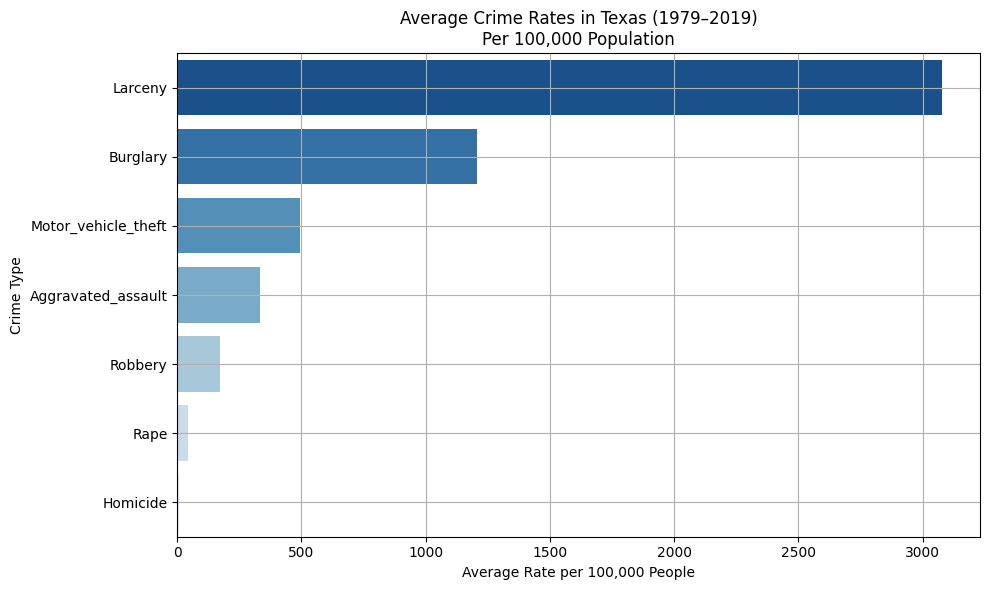

In [23]:
# Average crime rate per 100,000 for each type in Texas
crime_types = ['homicide', 'rape', 'robbery', 'aggravated_assault',
               'burglary', 'larceny', 'motor_vehicle_theft']

rate_cols = [f"{col}_rate" for col in crime_types]
avg_rates = texas_df[rate_cols].mean().sort_values(ascending=False)

# 📊 Bar chart of average crime rates
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rates.values, y=[col.replace("_rate", "").capitalize() for col in avg_rates.index], palette="Blues_r")
plt.title("Average Crime Rates in Texas (1979–2019)\nPer 100,000 Population")
plt.xlabel("Average Rate per 100,000 People")
plt.ylabel("Crime Type")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📌 Final Summary

This project focused on analyzing crime trends in **Texas** from 1979 to 2019 using data from the FBI's Summary Reporting System (SRS). After filtering the dataset for Texas, we cleaned and structured the data to include total crimes and per capita crime rates for fair comparison over time.

### 🔍 Key Insights:
- **1991** had the highest total number of reported crimes in Texas: **1,356,527 cases**.
- **1979** had the lowest total number of crimes: **793,097 cases**.
- **Larceny** was consistently the most common type of crime in Texas across the 40-year span.
- Overall, **property crimes** were significantly more frequent than **violent crimes**.

### 📊 Visualizations included:
- Total crime trends over time
- Property vs violent crime comparison
- Bar charts comparing crime types in peak vs. low-crime years
- Average crime rate per type

This analysis can support law enforcement planning, community awareness, and further academic research focused specifically on **Texas**.